In [1]:
#Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
#Loading the dataset from train.CSV file

train = pd.read_csv('train.csv')

# Data Summary 

In [ ]:
#Glance at Data - shape and basic info

In [3]:
train.shape

(595212, 59)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

# MetaData DataFrame for Reference

In [5]:
#Creating Metadata DataFrame so that it will be easy to handle and manipulate data during data exploration steps

#role: input, ID, target
#level: nominal, interval, ordinal, binary
#keep: True or False
#dtype: int, float, str

MetaData = pd.DataFrame(columns=['variable','role', 'level', 'keep', 'dtype'])
data =[]
for columns in train.columns:
    
    #Defining Role
    
    if columns == 'id':
        role = 'id'
    elif columns == 'target':
        role = 'target'
    else:
        role = 'input'
        
    #Defining DataTypes
    
    dtype = train[columns].dtype
    
    #Defining keep
    
    keep = True
    
    #Defining Level
    
    if columns[-3:] == 'bin' or columns == 'target':
        level = 'binary'
    elif columns[-3:] == 'cat' or columns == 'id':
        level = 'categorical' 
    elif train[columns].dtype == float:
        level = 'interval'
    elif train[columns].dtype == np.int64:
        level = 'ordinal'
        
        
    f_dict = {
        'variable' : columns,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    
    data.append(f_dict)

MetaData = MetaData.append(data)

print(MetaData)

          variable    role        level  keep    dtype
0               id      id  categorical  True    int64
1           target  target       binary  True    int64
2        ps_ind_01   input      ordinal  True    int64
3    ps_ind_02_cat   input  categorical  True    int64
4        ps_ind_03   input      ordinal  True    int64
5    ps_ind_04_cat   input  categorical  True    int64
6    ps_ind_05_cat   input  categorical  True    int64
7    ps_ind_06_bin   input       binary  True    int64
8    ps_ind_07_bin   input       binary  True    int64
9    ps_ind_08_bin   input       binary  True    int64
10   ps_ind_09_bin   input       binary  True    int64
11   ps_ind_10_bin   input       binary  True    int64
12   ps_ind_11_bin   input       binary  True    int64
13   ps_ind_12_bin   input       binary  True    int64
14   ps_ind_13_bin   input       binary  True    int64
15       ps_ind_14   input      ordinal  True    int64
16       ps_ind_15   input      ordinal  True    int64
17   ps_in

In [6]:
#Distribution of variables across levels

MetaData.groupby('level')[['variable']].count()

,variable
level,
binary,18
categorical,15
interval,10
ordinal,16


# Missing Values

In [7]:
#Checking variables for missing values

missing = []

for columns in train.columns:
    missing_count = train[train[columns] == -1][columns].count()
    if missing_count > 0:
        missing.append(columns)
        missings_perc = missing_count*100/train.shape[0]
        
        print('Variable %s has %i missing with %f percentage'%(columns, missing_count, missings_perc))
        
print('\nIn total, there are {} variables with missing values'.format(len(missing)))

Variable ps_ind_02_cat has 216 missing with 0.036290 percentage
Variable ps_ind_04_cat has 83 missing with 0.013945 percentage
Variable ps_ind_05_cat has 5809 missing with 0.975955 percentage
Variable ps_reg_03 has 107772 missing with 18.106490 percentage
Variable ps_car_01_cat has 107 missing with 0.017977 percentage
Variable ps_car_02_cat has 5 missing with 0.000840 percentage
Variable ps_car_03_cat has 411231 missing with 69.089837 percentage
Variable ps_car_05_cat has 266551 missing with 44.782531 percentage
Variable ps_car_07_cat has 11489 missing with 1.930237 percentage
Variable ps_car_09_cat has 569 missing with 0.095596 percentage
Variable ps_car_11 has 5 missing with 0.000840 percentage
Variable ps_car_12 has 1 missing with 0.000168 percentage
Variable ps_car_14 has 42620 missing with 7.160474 percentage

In total, there are 13 variables with missing values


In [ ]:
#We can remove variables as ps_car_03_cat 69% and ps_car_05_cat 44.7% missing values 

In [ ]:
#Updating the MetaData DataFrame for ps_car_03_cat and ps_car_05_cat (Keep = False)

In [8]:
MetaData.loc[MetaData['variable'] == 'ps_car_03_cat', 'keep'] = False
MetaData.loc[MetaData['variable'] == 'ps_car_05_cat', 'keep'] = False

In [ ]:
#For other variables, we can treat missing values 

In [9]:
#Correlation between different types of variables
#Creating list of interval, categorical, binary and ordinal variables

for variable in MetaData.variable:
    IntervalVar = MetaData[MetaData.level=='interval']['variable']
    CategoricalVar = MetaData[MetaData.level=='categorical']['variable']
    BinaryVar = MetaData[MetaData.level=='binary']['variable']
    OrdinalVar = MetaData[MetaData.level=='ordinal']['variable']


c:\users\hp\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


target
0    573518
1     21694
Name: target, dtype: int64

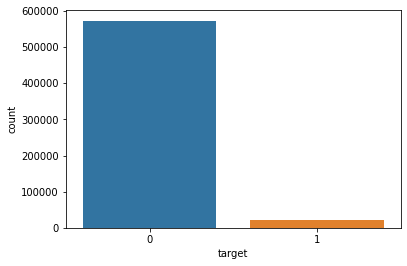

In [10]:
#Count of target variable.

sns.countplot(train.target)
train.groupby('target')['target'].count()

In [11]:
#correlation
ind_col = [w for w in train.columns if 'ind' in w]
reg_col = [w for w in train.columns if 'reg' in w]
car_col = [w for w in train.columns if 'car' in w]

<AxesSubplot:>

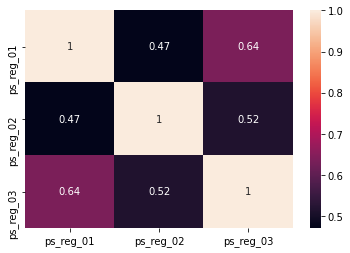

In [12]:
sns.heatmap(train[reg_col].corr(), annot= True)

In [ ]:
#Reg variable seems to somewhat related

In [13]:
#Removing variables that has high missing value count i.e ps_car_03_cat and ps_car_05_cat

train1 = train.drop(['ps_car_03_cat', 'ps_car_05_cat'], axis = 1)

In [14]:
#Checking dataframe after removing the 2 variables
#Number of variables at this point: 57

train1.head(5)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [15]:
#Importing sklearn library Imputer for imputing mean and mode in varaibles

#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

In [16]:
mean_imp = SimpleImputer(missing_values=-1, strategy='mean')

#mean_imp = Imputer(missing_values=-1, strategy='mean', axis=0)


In [17]:
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']

# Imputing with the mean or mode----only non categorical variables
#imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
mean_imp = SimpleImputer(missing_values=-1, strategy='mean')
mode_imp = SimpleImputer(missing_values=-1, strategy='most_frequent')
train1['ps_reg_03'] = mean_imp.fit_transform(train1[['ps_reg_03']]).ravel()
train1['ps_car_12'] = mode_imp.fit_transform(train1[['ps_car_12']]).ravel()
train1['ps_car_14'] = mean_imp.fit_transform(train1[['ps_car_14']]).ravel()
train1['ps_car_11'] = mode_imp.fit_transform(train1[['ps_car_11']]).ravel()

In [18]:
#Imputing missing values in categorical variables by there Mode

missing = [ i for i in missing if not i in vars_to_drop]

for columns in missing:
    train1.loc[train1[columns] == -1, columns] = train1[columns].mode()[0]

In [19]:
#Checking the data frame after imputing missing values

train1.head(5)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [20]:
#Checking missing values in the data, if any.

missing = []

for columns in train1.columns:
    missing_count = train1[train1[columns] == -1][columns].count()
    if missing_count > 0:
        missing.append(columns)
        missings_perc = missing_count/train1.shape[0]
        
        print('Variable %s has %i missing with %f percentage'%(columns, missing_count, missings_perc))
        
print('\nIn total, there are {} variables with missing values'.format(len(missing)))


In total, there are 0 variables with missing values


In [21]:
#Checking dataframe shape

train1.shape

(595212, 57)

In [ ]:
#Handling Categorical Variables
#Creating dummy variables using get_dummies

In [22]:
#Creating list of categorical variables

cat_feat = MetaData[(MetaData.level == 'categorical') & (MetaData.keep == True)].variable

In [23]:
#Creating dummy variables of categorical variables except variable - ps_car_11_cat as it conatins more than 100 categories

v = MetaData[(MetaData.level == 'categorical') & (MetaData.keep)].variable
v = [w for w in list(v) if w!='id' and w!='ps_car_11_cat']

In [24]:
#Printing number of variables before and after dummification

print('Before dummification we have {} variables in train'.format(train1.shape[1]))
train2 = pd.get_dummies(train1, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(train2.shape[1]))

Before dummification we have 57 variables in train
After dummification we have 102 variables in train


In [ ]:
#Work till now
#Missing value treatment for all feature
#Dummification of categorical value excluding ps_car_11_cat

# Removing calculated variables

In [25]:
#Removing calculated variables since there correlation with target variable is non significant

column_excluding_calc  = [w for w in train2.columns if "calc" not in w]
train3 = train2[column_excluding_calc]

In [26]:
#Checking shape of data frame after removing calculated variables

train3.shape

(595212, 82)

# Outlier

In [27]:
#Detecting outlier

from collections import Counter

def detect_outlier(df):
    features = df.columns
    outliers  = []
    for i, feature in enumerate(features):
        if df[feature].dtype == 'float64':
            # Calculate Q1 (25th percentile of the data) for the given feature
            Q1 = np.percentile(df[feature], 25)
            # Calculate Q3 (75th percentile of the data) for the given feature
            Q3 = np.percentile(df[feature], 75)
            # Use the interquartile range to calculate an outlier step
            step = 1.5 * (Q3 - Q1)
            feature_outliers = df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))]
            outliers.extend(list(feature_outliers.index.values))
            print('Feature: {}, outliers: {}\n'.format(feature, len(feature_outliers.index)))
    
    multi_feature_outliers = (Counter(outliers) - Counter(set(outliers))).keys()
    return multi_feature_outliers

In [28]:
#Printing the variables and number of outliers

outliers  = detect_outlier(train3.drop(['id', 'target'], axis = 1))

Feature: ps_reg_01, outliers: 0

Feature: ps_reg_02, outliers: 36793

Feature: ps_reg_03, outliers: 35514

Feature: ps_car_12, outliers: 15355

Feature: ps_car_13, outliers: 26913

Feature: ps_car_14, outliers: 30420

Feature: ps_car_15, outliers: 27409



In [29]:
#Removing outliers from the data

train4 = train3.drop(train3.index[list(outliers)]).reset_index(drop = True)

print('Number of outliers occur more than one feature: {}'.format(len(outliers)))
print('Shape of old data: {}'.format(train3.shape))
print('Shape of new data: {}'.format(train4.shape))

Number of outliers occur more than one feature: 41346
Shape of old data: (595212, 82)
Shape of new data: (553866, 82)


In [ ]:
# We now have 82 variables

# Variable reduction

In [ ]:
#checking correlation of "REG" variables

In [30]:
ind_col = [w for w in train4.columns if 'ind' in w]
reg_col = [w for w in train4.columns if 'reg' in w]
car_col = [w for w in train4.columns if 'car' in w]

In [31]:
#Creating interaction variables for 'reg' variables since they are highly correlated
#Taking sum of reg variable

train4["sum_reg"] = train4["ps_reg_01"] + train4["ps_reg_02"] + train4["ps_reg_03"]

#Droping variables 'ps_reg_01 and ps_reg02

train5 = train4.drop(["ps_reg_01", "ps_reg_02"], axis = 1)

In [32]:
#Checking shape of dataframe after removal of correlated variables and addition of interaction variable

train5.shape

(553866, 81)

In [ ]:
#Removing low variance variables from the dataframe

In [33]:
#Checking the number of low variance variables in the data using VarianceThreshold from sklearn feature_selection 

from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=.01)
selector.fit(train5.drop(['id', 'target'], axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x : not x) # Function to toggle boolean array elements

v = train5.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

25 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_13', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2']


In [34]:
#Dropping the low variance variables from the data and checking the shape of the final dataframe

train5 = train5.drop(list(v), axis = 1)
train5.shape

(553866, 56)

<AxesSubplot:>

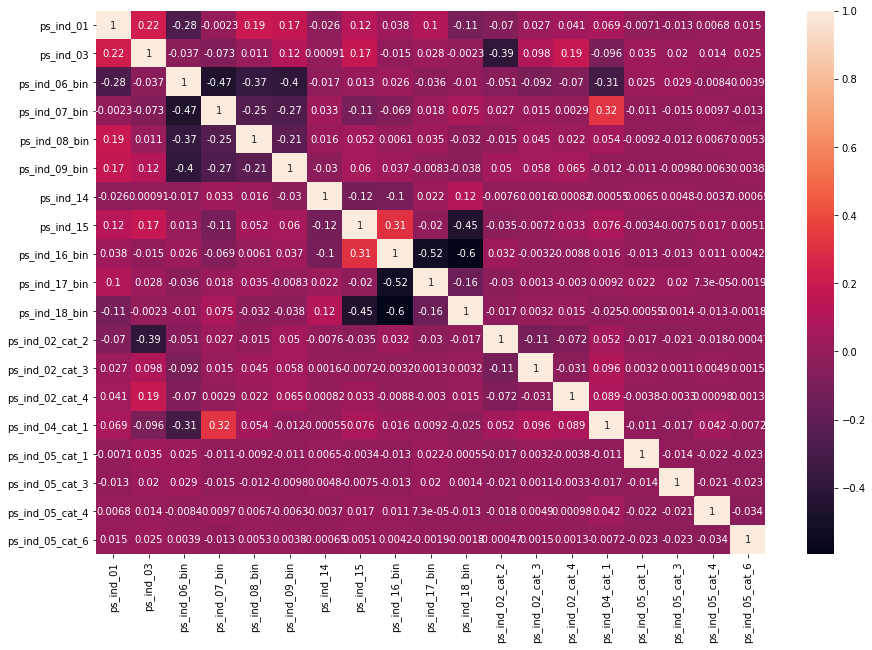

In [35]:
# Now working for correlation in "IND"
ind_col_new = [w for w in train5.columns if 'ind' in w]
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(train5[ind_col_new].corr(), annot= True)

In [36]:
# PS_ind_06_bin and PS_ind_07_bin high correlation - sp we drop PS_ind_06_bin
# ps_ind_16_bin corr with ps_ind_17_bin and ps_ind_18_bin so we drop ps_ind_16_bin
train5 = train5.drop(["ps_ind_06_bin", "ps_ind_16_bin"], axis = 1)

In [ ]:
# Now it's time to check CAR corrr..hope we get some luck

<AxesSubplot:>

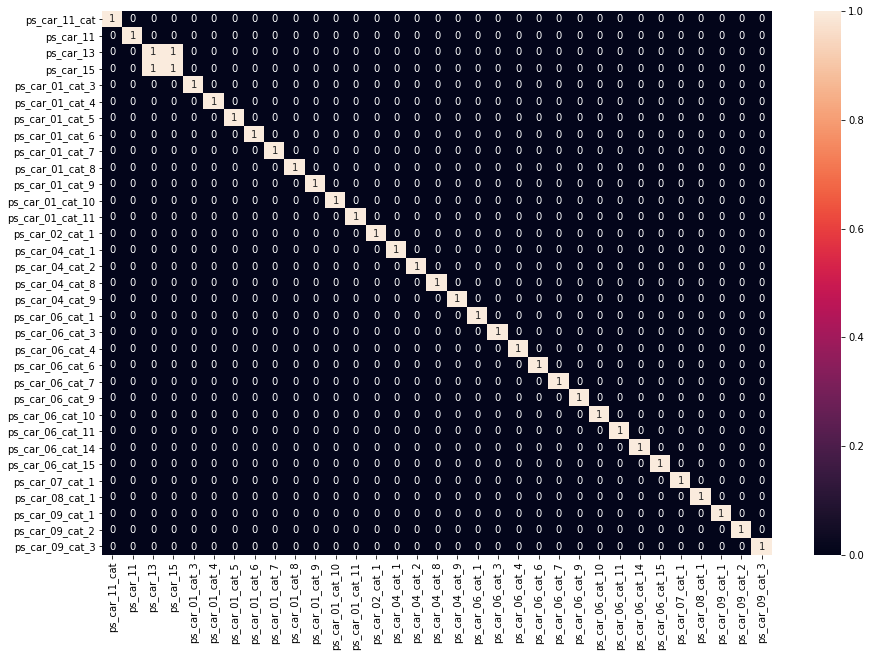

In [37]:
#Checking correlation of 'car' variables

car_col_new = [w for w in train5.columns if 'car' in w]
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(train5[car_col_new].corr() > 0.5, annot= True)

In [38]:
#Droping variable 'ps_car_15' as it is highly correlated with the variable 'ps_car_13' and checking the shape of resulting
#dataframe

train5 = train5.drop(["ps_car_15"], axis = 1)
train5.shape

(553866, 53)

# Test train split with handling imbalance class

In [ ]:
#Splitting the dataframe into test and train dataset for model building 
#Split is done in 70:30 ratio

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#Splitting
X_train, X_test, y_train, y_test = train_test_split(train5.drop(['target', 'id'], axis=1),
                                                    train5['target'].astype(int), test_size=0.30, random_state=101)

In [40]:
df_train_temp = X_train
df_train_temp['target'] = y_train

In [41]:
df_minority = df_train_temp[df_train_temp.target==1]
df_minority.shape

(13636, 52)

In [ ]:
#Downsampling

In [42]:
from sklearn.utils import resample
df_majority = df_train_temp[df_train_temp.target==0]
df_minority = df_train_temp[df_train_temp.target==1]
 
# Upsample minority class
df_majority_undersampled = resample(df_majority, 
                                 replace=True,     # sample with replacement
                                 n_samples=13566*8,    # to match majority class 100% of majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_undersampled = pd.concat([df_majority_undersampled, df_minority])
 
# Display new class counts
df_undersampled.target.value_counts()

0    108528
1     13636
Name: target, dtype: int64

In [ ]:
#Upsampling

In [43]:
from sklearn.utils import resample
df_majority = df_undersampled[df_undersampled.target==0]
df_minority = df_undersampled[df_undersampled.target==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=13566*2,    # to match majority class 100% of majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.target.value_counts()

0    108528
1     27132
Name: target, dtype: int64

In [44]:
X_train_res = df_upsampled.drop('target', axis = 1)
y_train_res = df_upsampled.target


# Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
mms = StandardScaler()
X_train_res_scaled = mms.fit_transform(X_train_res)
#y_train_res_scaled = mms.fit_transform(y_train_res)

# Machine Learning Models

In [ ]:
#logistic_Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
lm = LogisticRegression()
logistic_model = lm.fit(X_train_res, y_train_res)
from sklearn.metrics import classification_report, confusion_matrix
predictions_LM = logistic_model.predict(X_test)
print('Classification Report Logistic Regression')
print(classification_report(y_test,predictions_LM))
print('Confusion Matrix Logistic Regression')
print(confusion_matrix(y_test,predictions_LM))

c:\users\hp\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Classification Report Logistic Regression
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    160442
           1       0.12      0.01      0.01      5718

    accuracy                           0.96    166160
   macro avg       0.54      0.50      0.50    166160
weighted avg       0.94      0.96      0.95    166160

Confusion Matrix Logistic Regression
[[160176    266]
 [  5681     37]]


In [ ]:
#Random forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators=25, class_weight="balanced")
clf_RF.fit(X_train_res,y_train_res)
predictions_RF = clf_RF.predict(X_test)
print('Classification Report RandomForest Classifier')
print(confusion_matrix(y_test,predictions_RF))
print('\n Confusion Matrix RandomForest Classifier')
print(classification_report(y_test,predictions_RF))

Classification Report RandomForest Classifier
[[160153    289]
 [  5696     22]]

 Confusion Matrix RandomForest Classifier
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    160442
           1       0.07      0.00      0.01      5718

    accuracy                           0.96    166160
   macro avg       0.52      0.50      0.49    166160
weighted avg       0.93      0.96      0.95    166160



In [ ]:
#KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=2)
clf_KNN.fit(X_train_res,y_train_res)
predictions_KNN = clf_KNN.predict(X_test)
print('Classification Report Nearest Neighbors')
print(confusion_matrix(y_test,predictions_KNN))
print('\nConfusion Matrix Nearest Neighbors')
print(classification_report(y_test,predictions_KNN))

Classification Report Nearest Neighbors
[[149038  11404]
 [  5263    455]]

Confusion Matrix Nearest Neighbors
              precision    recall  f1-score   support

           0       0.97      0.93      0.95    160442
           1       0.04      0.08      0.05      5718

    accuracy                           0.90    166160
   macro avg       0.50      0.50      0.50    166160
weighted avg       0.93      0.90      0.92    166160

